In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '745fd5a9-a362-4b0a-a99c-ed18ba8cd6ec',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-26T18:07:19.251Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 10115}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11137, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [4]:
type(data)

dict

In [36]:
import pandas as pd

# set options to display the maximum columns

pd.set_option('display.max_columns', None)


In [60]:
# Now normalize the data and make in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11137,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19717096.00000,19717096.00000,False,NaN,1,NaN,NaN,None,2024-06-26T18:06:00.000Z,61095.07260,23200436748.08238,-32.87120,0.21551,-0.44682,-6.06980,-12.80666,-3.60264,-13.79115,1204617411630.83691,53.44500,1282996524652.89990,None,2024-06-26T18:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:57:13.298862
1,1027,Ethereum,ETH,ethereum,9102,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120178988.71263,120178988.71263,True,NaN,2,NaN,NaN,None,2024-06-26T18:05:00.000Z,3362.09950,11236518220.17144,-29.97130,0.68132,-0.75697,-5.53762,-14.48176,2.68165,-5.38332,404053718120.67114,17.91770,404053718120.66998,None,2024-06-26T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:57:13.298862
2,825,Tether USDt,USDT,tether,90113,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112829626104.05522,116076856624.97296,True,NaN,3,NaN,NaN,None,2024-06-26T18:05:00.000Z,0.99944,44954940310.71310,-25.87750,-0.02061,-0.02391,-0.02124,0.03739,0.00033,-0.05118,112766773213.38861,5.00170,116012194831.52000,None,2024-06-26T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-26 23:57:13.298862
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583434.20735,147583434.20735,False,NaN,4,NaN,NaN,None,2024-06-26T18:05:00.000Z,570.69103,1515925083.92273,-9.31200,0.07566,-0.61235,-4.69872,-6.44808,-4.39314,-1.95065,84224542045.02145,3.73220,84224542045.02000,None,2024-06-26T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:57:13.298862
4,5426,Solana,SOL,solana,692,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462244981.82858,578924875.29939,True,NaN,5,NaN,NaN,None,2024-06-26T18:05:00.000Z,135.88748,1792914272.67939,-38.36770,0.08730,-1.01500,-1.34558,-20.60492,-4.43024,-26.69780,62813305005.16789,2.78550,78668641514.31000,None,2024-06-26T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:57:13.298862
5,3408,USDC,USDC,usd-coin,20397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32837165679.81855,32837165679.81855,False,NaN,6,NaN,NaN,None,2024-06-26T18:05:00.000Z,0.99983,4989548464.60454,-27.48540,0.00462,-0.02369,-0.02210,-0.01891,-0.03005,-0.01216,32831668119.23940,1.45490,32831668119.24000,None,2024-06-26T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-26 23:57:13.298862
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55618185850.00000,99987512072.00000,False,NaN,7,NaN,NaN,None,2024-06-26T18:06:00.000Z,0.46788,886164503.59101,-9.82900,-0.09029,-1.73900,-5.95351,-12.86909,-10.38485,-26.11361,26022472644.28159,1.15310,46787704860.53000,None,2024-06-26T18:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:57:13.298862
7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2459482589.83665,5108134172.62087,True,NaN,8,3414166606.00000,25505913608.00528,None,2024-06-26T18:05:00.000Z,7.47061,231264148.82543,-33.15950,0.25224,0.18633,7.15992,16.10839,38.13668,50.82040,18373839854.95135,0.81480,38160887836.00000,

In [14]:


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '745fd5a9-a362-4b0a-a99c-ed18ba8cd6ec',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    # save the file if it exists otherwise it will create new file
    if not os.path.isfile(r'OneDrive\API.csv'):
        df.to_csv(r'OneDrive\API.csv', header='column_names')
    else:
        df.to_csv(r'OneDrive\API.csv', mode='a', header=False)

In [16]:
import os
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print("API Runner completed!")
    sleep(10)  # sleep for 30 seconds or half minute
exit()

API Runner completed!
API Runner completed!
API Runner completed!
API Runner completed!
API Runner completed!


In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11137,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19717096.00000,19717096.00000,False,NaN,1,NaN,NaN,None,2024-06-26T18:06:00.000Z,61095.07260,23200436748.08238,-32.87120,0.21551,-0.44682,-6.06980,-12.80666,-3.60264,-13.79115,1204617411630.83691,53.44500,1282996524652.89990,None,2024-06-26T18:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:37:24.502002
1,1027,Ethereum,ETH,ethereum,9102,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120178988.71263,120178988.71263,True,NaN,2,NaN,NaN,None,2024-06-26T18:05:00.000Z,3362.09950,11236518220.17144,-29.97130,0.68132,-0.75697,-5.53762,-14.48176,2.68165,-5.38332,404053718120.67114,17.91770,404053718120.66998,None,2024-06-26T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:37:24.502002
2,825,Tether USDt,USDT,tether,90113,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112829626104.05522,116076856624.97296,True,NaN,3,NaN,NaN,None,2024-06-26T18:05:00.000Z,0.99944,44954940310.71310,-25.87750,-0.02061,-0.02391,-0.02124,0.03739,0.00033,-0.05118,112766773213.38861,5.00170,116012194831.52000,None,2024-06-26T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-26 23:37:24.502002
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583434.20735,147583434.20735,False,NaN,4,NaN,NaN,None,2024-06-26T18:05:00.000Z,570.69103,1515925083.92273,-9.31200,0.07566,-0.61235,-4.69872,-6.44808,-4.39314,-1.95065,84224542045.02145,3.73220,84224542045.02000,None,2024-06-26T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:37:24.502002
4,5426,Solana,SOL,solana,692,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462244981.82858,578924875.29939,True,NaN,5,NaN,NaN,None,2024-06-26T18:05:00.000Z,135.88748,1792914272.67939,-38.36770,0.08730,-1.01500,-1.34558,-20.60492,-4.43024,-26.69780,62813305005.16789,2.78550,78668641514.31000,None,2024-06-26T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:37:24.502002
5,3408,USDC,USDC,usd-coin,20397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32837165679.81855,32837165679.81855,False,NaN,6,NaN,NaN,None,2024-06-26T18:05:00.000Z,0.99983,4989548464.60454,-27.48540,0.00462,-0.02369,-0.02210,-0.01891,-0.03005,-0.01216,32831668119.23940,1.45490,32831668119.24000,None,2024-06-26T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-26 23:37:24.502002
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55618185850.00000,99987512072.00000,False,NaN,7,NaN,NaN,None,2024-06-26T18:06:00.000Z,0.46788,886164503.59101,-9.82900,-0.09029,-1.73900,-5.95351,-12.86909,-10.38485,-26.11361,26022472644.28159,1.15310,46787704860.53000,None,2024-06-26T18:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-26 23:37:24.502002
7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2459482589.83665,5108134172.62087,True,NaN,8,3414166606.00000,25505913608.00528,None,2024-06-26T18:05:00.000Z,7.47061,231264148.82543,-33.15950,0.25224,0.18633,7.15992,16.10839,38.13668,50.82040,18373839854.95135,0.81480,38160887836.00000,

In [20]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [22]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.21551,-0.44682,-6.06980,-12.80666,-3.60264,-13.79115
Ethereum,0.68132,-0.75697,-5.53762,-14.48176,2.68165,-5.38332
Tether USDt,-0.02061,-0.02391,-0.02124,0.03739,0.00033,-0.05118
BNB,0.07566,-0.61235,-4.69872,-6.44808,-4.39314,-1.95065
Solana,0.08730,-1.01500,-1.34558,-20.60492,-4.43024,-26.69780
USDC,0.00462,-0.02369,-0.02210,-0.01891,-0.03005,-0.01216
XRP,-0.09029,-1.73900,-5.95351,-12.86909,-10.38485,-26.11361
Toncoin,0.25224,0.18633,7.15992,16.10839,38.13668,50.82040
Dogecoin,-0.36961,-2.86945,-0.51789,-28.02466,-17.75129,-44.21487


In [24]:
df4 =df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      0.21551
          quote.USD.percent_change_24h    -0.44682
          quote.USD.percent_change_7d     -6.06980
          quote.USD.percent_change_30d   -12.80666
          quote.USD.percent_change_60d    -3.60264
                                            ...   
Polkadot  quote.USD.percent_change_24h    -1.17792
          quote.USD.percent_change_7d     -0.75035
          quote.USD.percent_change_30d   -24.29874
          quote.USD.percent_change_60d   -15.14037
          quote.USD.percent_change_90d   -38.57460
Length: 90, dtype: float64

In [26]:
df4.count()

90

In [28]:
df5 = df4.to_frame(name='values')
df5
                   

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.21551
         quote.USD.percent_change_24h  -0.44682
         quote.USD.percent_change_7d   -6.06980
         quote.USD.percent_change_30d -12.80666
         quote.USD.percent_change_60d  -3.60264
...                                         ...
Polkadot quote.USD.percent_change_24h  -1.17792
         quote.USD.percent_change_7d   -0.75035
         quote.USD.percent_change_30d -24.29874
         quote.USD.percent_change_60d -15.14037
         quote.USD.percent_change_90d -38.57460

[90 rows x 1 columns]

In [38]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.21551
1,Bitcoin,quote.USD.percent_change_24h,-0.44682
2,Bitcoin,quote.USD.percent_change_7d,-6.06980
3,Bitcoin,quote.USD.percent_change_30d,-12.80666
4,Bitcoin,quote.USD.percent_change_60d,-3.60264
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,-1.17792
86,Polkadot,quote.USD.percent_change_7d,-0.75035
87,Polkadot,quote.USD.percent_change_30d,-24.29874
88,Polkadot,quote.USD.percent_change_60d,-15.14037


In [40]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.21551
1,Bitcoin,quote.USD.percent_change_24h,-0.44682
2,Bitcoin,quote.USD.percent_change_7d,-6.06980
3,Bitcoin,quote.USD.percent_change_30d,-12.80666
4,Bitcoin,quote.USD.percent_change_60d,-3.60264
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,-1.17792
86,Polkadot,quote.USD.percent_change_7d,-0.75035
87,Polkadot,quote.USD.percent_change_30d,-24.29874
88,Polkadot,quote.USD.percent_change_60d,-15.14037


In [54]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.21551
1,Bitcoin,24h,-0.44682
2,Bitcoin,7d,-6.06980
3,Bitcoin,30d,-12.80666
4,Bitcoin,60d,-3.60264
...,...,...,...
85,Polkadot,24h,-1.17792
86,Polkadot,7d,-0.75035
87,Polkadot,30d,-24.29874
88,Polkadot,60d,-15.14037


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

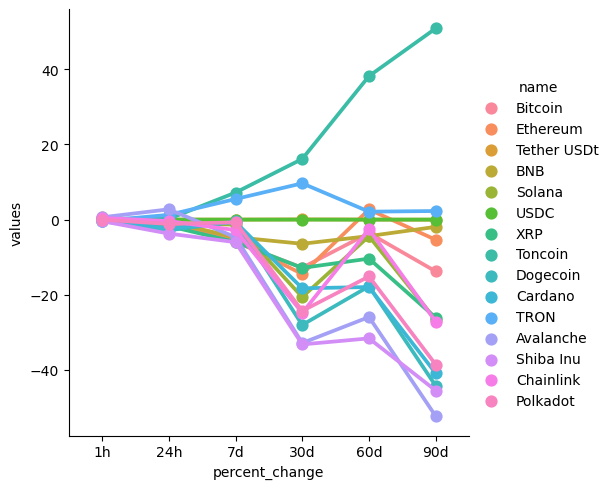

In [58]:
sns.catplot(x='percent_change', y='values', hue='name', data= df7, kind='point')

In [68]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df8.query('name== "Bitcoin"')
df9

,name,quote.USD.price,timestamp
0,Bitcoin,61095.07260,2024-06-26 23:57:13.298862


## its showing one row because the API for loop just one time.